In [120]:
# %load ~/.ipython/standard_imports.py
import os
import sys
import logging
import itertools
import functools

logging.basicConfig(level=logging.INFO)
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import scipy.stats

import isajosep_util
import isajosep_util.data_frame_plotter

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Ultimately, our goal is to build a ML model that predicts the Diagnosis (DX), based on symptoms and other factors. In the project you can demonstrate doing some or all of the following:
- Perform exploratory analysis and visualization of data 
- **Build one or more ML models on the data (this sheet)**
- **Select the best model, and report its performance and error analysis (this sheet)**
- Perform feature selection to find most salient features
- Explore ways to deal with unbalanced data
- Try using external ML classifies (e.g. IBM Watson)
etc, etc

In [6]:
formatted_data = pd.read_pickle('/Users/ijoseph/Code/Data/Gyant/final_formatting_all_obs.pkl')

# Encoding 

In [7]:
le = sklearn.preprocessing.LabelEncoder()
le_fit = le.fit(formatted_data.DX)
le_trans = le_fit.transform(formatted_data.DX)

In [8]:
formatted_data['DX_enc'] = le_trans

In [9]:
formatted_data.reset_index(inplace=True)

# Normalizing

In [10]:
import sklearn.preprocessing

In [22]:
standard_normed = pd.DataFrame(sklearn.preprocessing.StandardScaler().fit_transform(formatted_data.drop(['DX', 'DX_enc'], axis=1)), index=formatted_data.index , columns=formatted_data.drop(['DX', 'DX_enc'], axis=1).columns)

/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
standard_normed['DX_enc'] = formatted_data.DX_enc

# Train/Test Split

Split with seed 42

In [24]:
train, test = sklearn.model_selection.train_test_split(standard_normed, random_state=42)

In [25]:
train.shape, test.shape

((15916, 2261), (5306, 2261))

# Model Tuning (via CV)

Use some form of Stochastic Gradient Descent (computes gradients on subset of observations to save time but sacrifice accuracy) for speedups.

## SVC

In [26]:
import sklearn.linear_model

>‘hinge’ gives a linear SVM.

>The ‘log’ loss gives logistic regression, a probabilistic classifier. 

>‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. 

>‘squared_hinge’ is like hinge but is quadratically penalized. 

>‘perceptron’ is the linear loss used by the perceptron algorithm. 

In [27]:
svc_est = sklearn.linear_model.SGDClassifier(loss='hinge', penalty ='elasticnet', verbose=2, random_state=42)

**ElasticNet** penalty. Randomized Search $\alpha$ (overlal penalty)  from $1 \times 10^{-8}$ to $1 \times 10^{8}$, `l1_ratio` (relative $L_1$ vs $L_2$ peantly) from 0.1 to 0.9

In [28]:
param_distributions = {'alpha': np.logspace(-8,8), 'l1_ratio': np.linspace(0.1,0.9)}

In [29]:
rscv_svc = sklearn.model_selection.RandomizedSearchCV(estimator=svc_est, param_distributions=param_distributions, n_jobs=3, cv=3, verbose=3, random_state=42)

In [30]:
fit_rscv_svc = rscv_svc.fit(X=train.drop('DX_enc', axis=1), y=train.DX_enc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  2.3min finished
/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 59.88, NNZs: 898, Bias: -204.440537, T: 15916, Avg. loss: 8.699071
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 51.31, NNZs: 864, Bias: -195.900410, T: 31832, Avg. loss: 3.625062
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 48.74, NNZs: 860, Bias: -190.944191, T: 47748, Avg. loss: 3.285287
Total training time: 0.54 seconds.
-- Epoch 4
Norm: 47.34, NNZs: 850, Bias: -187.498074, T: 63664, Avg. loss: 3.088124
Total training time: 0.72 seconds.
-- Epoch 5
Norm: 46.50, NNZs: 853, Bias: -184.836332, T: 79580, Avg. loss: 2.956824
Total training time: 0.89 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 56.57, NNZs: 844, Bias: -172.803930, T: 15916, Avg. loss: 7.335086
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 47.06, NNZs: 819, Bias: -165.096411, T: 31832, Avg. loss: 2.900860
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 43.59, NNZs: 798, Bias: -160.693205, T: 47748, Avg. loss: 2.637630
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 42.11, NNZs: 803, Bias: -157.496739, T: 63664, Avg. loss: 2.532757
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 40.87, NNZs: 788, Bias: -155.118835, T: 79580, Avg. loss: 2.427951
Total training time: 0.89 seconds.
-- Epoch 1
Norm: 36.48, NNZs: 696, Bias: -233.916561, T: 15916, Avg. loss: 3.955560
Total training time: 0.19 seconds.
-- Epoch 2
Norm: 23.48, NNZs: 590, Bias: -232.383398, T: 31832, Avg. loss: 1.624043
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 18.66, NNZs: 536, Bias: -231.449999, T: 47748, Avg. loss: 1.627520
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 16.11, NNZs: 489, Bias: -230.805457, T: 63

Norm: 27.79, NNZs: 571, Bias: -228.554438, T: 79580, Avg. loss: 1.109924
Total training time: 0.77 seconds.
-- Epoch 1
Norm: 41.88, NNZs: 757, Bias: -225.425322, T: 15916, Avg. loss: 4.317822
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 30.68, NNZs: 729, Bias: -223.051708, T: 31832, Avg. loss: 1.572784
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 27.09, NNZs: 720, Bias: -221.657710, T: 47748, Avg. loss: 1.563562
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 25.42, NNZs: 703, Bias: -220.657586, T: 63664, Avg. loss: 1.537855
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 24.37, NNZs: 688, Bias: -219.898525, T: 79580, Avg. loss: 1.521166
Total training time: 0.80 seconds.
-- Epoch 1
Norm: 54.67, NNZs: 835, Bias: -195.634685, T: 15916, Avg. loss: 5.073169
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 44.18, NNZs: 788, Bias: -190.969483, T: 31832, Avg. loss: 1.411197
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 40.98, NNZs: 769, Bias: -188.190458, T: 47

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   21.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=2, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=3,
          param_distributions={'alpha': array([  1.00000e-08,   2.12095e-08,   4.49843e-08,   9.54095e-08,
         2.02359e-07,   4.29193e-07,   9.10298e-07,   1.93070e-06,
         4.09492e-06,   8.68511e-06,   1.84207e-05,   3.90694e-05,
         8.28643e-05,   1.75751e-04,   3.72759e-04,   7.90604e-04,
  ...939,
        0.78571,  0.80204,  0.81837,  0.83469,  0.85102,  0.86735,
        0.88367,  0.9    ])},
          pre_dispatch='2*n_jobs', rand

In [32]:
fit_rscv_svc.best_score_

0.63112591103292282

In [33]:
fit_rscv_svc.best_params_

{'alpha': 0.0035564803062231283, 'l1_ratio': 0.26326530612244903}

Get prediction

In [35]:
fit_rscv_svc.best_estimator_

SGDClassifier(alpha=0.0035564803062231283, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.26326530612244903, learning_rate='optimal', loss='hinge',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='elasticnet', power_t=0.5, random_state=42, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=2, warm_start=False)

## Logistic Regression

In [48]:
lr_est = sklearn.linear_model.SGDClassifier(loss='log', penalty ='elasticnet', verbose=2, random_state=42)

In [49]:
param_distributions = {'alpha': np.logspace(-8,8), 'l1_ratio': np.linspace(0.1,0.9)}

In [50]:
rscv_lr = sklearn.model_selection.RandomizedSearchCV(estimator=lr_est, param_distributions=param_distributions, n_jobs=3, cv=3, verbose=3, random_state=42)

In [51]:
fit_rscv_lr = rscv_lr.fit(X=train.drop('DX_enc', axis=1), y=train.DX_enc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  3.1min finished
/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 59.65, NNZs: 905, Bias: -190.156164, T: 15916, Avg. loss: 7.718117
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 50.15, NNZs: 866, Bias: -181.921797, T: 31832, Avg. loss: 3.073852
Total training time: 0.68 seconds.
-- Epoch 3
Norm: 47.27, NNZs: 860, Bias: -177.127108, T: 47748, Avg. loss: 2.825486
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 45.75, NNZs: 858, Bias: -173.777732, T: 63664, Avg. loss: 2.665398
Total training time: 1.33 seconds.
-- Epoch 5
Norm: 44.74, NNZs: 856, Bias: -171.214844, T: 79580, Avg. loss: 2.544233
Total training time: 1.67 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


Norm: 55.93, NNZs: 818, Bias: -169.962616, T: 15916, Avg. loss: 7.026185
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 46.77, NNZs: 804, Bias: -162.241155, T: 31832, Avg. loss: 2.759722
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 43.19, NNZs: 796, Bias: -157.885005, T: 47748, Avg. loss: 2.513449
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 41.63, NNZs: 800, Bias: -154.733250, T: 63664, Avg. loss: 2.406449
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 40.36, NNZs: 789, Bias: -152.384405, T: 79580, Avg. loss: 2.314720
Total training time: 1.76 seconds.
-- Epoch 1
Norm: 37.25, NNZs: 704, Bias: -228.694634, T: 15916, Avg. loss: 3.769729
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 24.00, NNZs: 588, Bias: -227.161471, T: 31832, Avg. loss: 1.556314
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 19.10, NNZs: 539, Bias: -226.228071, T: 47748, Avg. loss: 1.559994
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 16.50, NNZs: 494, Bias: -225.583530, T: 63

Norm: 24.94, NNZs: 551, Bias: -199.732352, T: 79580, Avg. loss: 0.949376
Total training time: 1.66 seconds.
-- Epoch 1
Norm: 41.78, NNZs: 766, Bias: -231.740257, T: 15916, Avg. loss: 4.274321
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 30.92, NNZs: 738, Bias: -229.336219, T: 31832, Avg. loss: 1.624302
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 27.25, NNZs: 716, Bias: -227.941865, T: 47748, Avg. loss: 1.603528
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 25.66, NNZs: 703, Bias: -226.933953, T: 63664, Avg. loss: 1.583476
Total training time: 1.35 seconds.
-- Epoch 5
Norm: 24.55, NNZs: 675, Bias: -226.178433, T: 79580, Avg. loss: 1.563035
Total training time: 1.66 seconds.
-- Epoch 1
Norm: 49.91, NNZs: 781, Bias: -181.744993, T: 15916, Avg. loss: 4.346727
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 40.80, NNZs: 741, Bias: -177.248851, T: 31832, Avg. loss: 1.256004
Total training time: 0.67 seconds.
-- Epoch 3
Norm: 38.18, NNZs: 718, Bias: -174.550489, T: 47

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   43.1s finished


In [52]:
fit_rscv_lr.best_score_

0.63024629303845192

In [53]:
fit_rscv_lr.best_params_

{'alpha': 0.0035564803062231283, 'l1_ratio': 0.26326530612244903}

Get prediction

In [54]:
fit_rscv_lr.best_estimator_

SGDClassifier(alpha=0.0035564803062231283, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.26326530612244903, learning_rate='optimal', loss='log',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='elasticnet', power_t=0.5, random_state=42, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=2, warm_start=False)

# Training Performance

In [39]:
retrainer = sklearn.linear_model.SGDClassifier(loss='hinge', penalty ='elasticnet', verbose=2, random_state=42)

Retrain using best params on full training set. 

In [42]:
retrainer = retrainer.set_params(**fit_rscv_svc.best_estimator_.get_params())

In [44]:
retrainer_fit = retrainer.fit(X=train.drop('DX_enc', axis=1), y=train.DX_enc)

/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 59.88, NNZs: 898, Bias: -204.440537, T: 15916, Avg. loss: 8.699071
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 51.31, NNZs: 864, Bias: -195.900410, T: 31832, Avg. loss: 3.625062
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 48.74, NNZs: 860, Bias: -190.944191, T: 47748, Avg. loss: 3.285287
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 47.34, NNZs: 850, Bias: -187.498074, T: 63664, Avg. loss: 3.088124
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 46.50, NNZs: 853, Bias: -184.836332, T: 79580, Avg. loss: 2.956824
Total training time: 0.84 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


Norm: 56.57, NNZs: 844, Bias: -172.803930, T: 15916, Avg. loss: 7.335086
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 47.06, NNZs: 819, Bias: -165.096411, T: 31832, Avg. loss: 2.900860
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 43.59, NNZs: 798, Bias: -160.693205, T: 47748, Avg. loss: 2.637630
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 42.11, NNZs: 803, Bias: -157.496739, T: 63664, Avg. loss: 2.532757
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 40.87, NNZs: 788, Bias: -155.118835, T: 79580, Avg. loss: 2.427951
Total training time: 0.85 seconds.
-- Epoch 1
Norm: 36.48, NNZs: 696, Bias: -233.916561, T: 15916, Avg. loss: 3.955560
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 23.48, NNZs: 590, Bias: -232.383398, T: 31832, Avg. loss: 1.624043
Total training time: 0.34 seconds.
-- Epoch 3
Norm: 18.66, NNZs: 536, Bias: -231.449999, T: 47748, Avg. loss: 1.627520
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 16.11, NNZs: 489, Bias: -230.805457, T: 63

Norm: 41.88, NNZs: 757, Bias: -225.425322, T: 15916, Avg. loss: 4.317822
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 30.68, NNZs: 729, Bias: -223.051708, T: 31832, Avg. loss: 1.572784
Total training time: 0.33 seconds.
-- Epoch 3
Norm: 27.09, NNZs: 720, Bias: -221.657710, T: 47748, Avg. loss: 1.563562
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 25.42, NNZs: 703, Bias: -220.657586, T: 63664, Avg. loss: 1.537855
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 24.37, NNZs: 688, Bias: -219.898525, T: 79580, Avg. loss: 1.521166
Total training time: 0.81 seconds.
-- Epoch 1
Norm: 54.67, NNZs: 835, Bias: -195.634685, T: 15916, Avg. loss: 5.073169
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 44.18, NNZs: 788, Bias: -190.969483, T: 31832, Avg. loss: 1.411197
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 40.98, NNZs: 769, Bias: -188.190458, T: 47748, Avg. loss: 1.337339
Total training time: 0.51 seconds.
-- Epoch 4
Norm: 39.18, NNZs: 758, Bias: -186.272387, T: 63

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   21.1s finished


In [57]:
print("Subset accuracy (correcly-classified observations / total observations): {:.2f}".format(retrainer_fit.score(X=train.drop('DX_enc', axis=1), y=train.DX_enc)))

Subset accuracy (correcly-classified observations / total observations): 0.68


Subset accuracy score. Not bad. 
> [subset accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

However, not super informative in unbalanced siutations like the above (perhaps, e.g., if 68% of training data is the exact same label, a degenerate classifier that merely just spits out that label would do quite as well). To be fair, we're not in this regime as only at most 9% of our training set is the same label, so we still have decent performance.
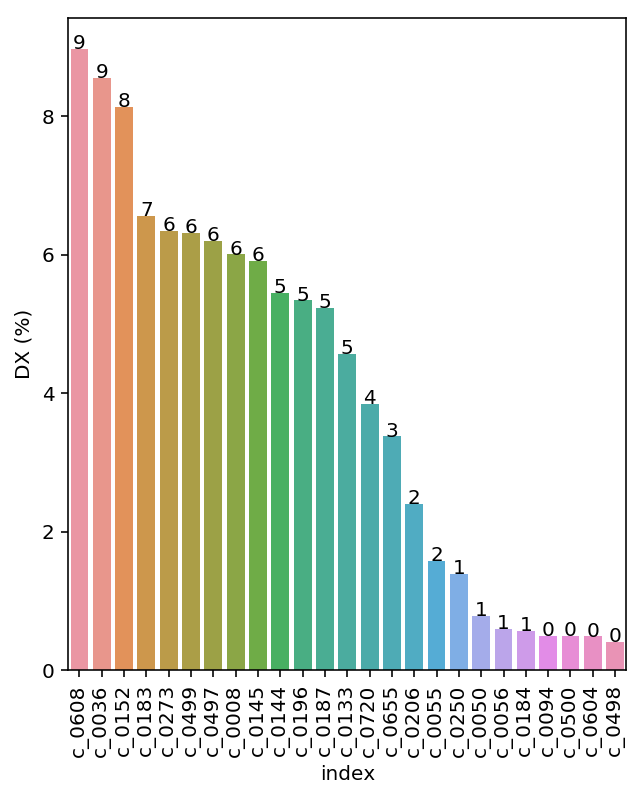 

In [61]:
y_pred = retrainer_fit.predict(train.drop('DX_enc', axis=1))

In [84]:
import sklearn.externals.joblib

In [85]:
le_encoder = sklearn.externals.joblib.load('/Users/ijoseph/Code/Data/Gyant/encoder.pkl')

In [91]:
y_true_lbl = [le_encoder.classes_[i]  for i in train.DX_enc]
y_pred_lbl = [le_encoder.classes_[i] for i in y_pred]

## Classification Report

/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


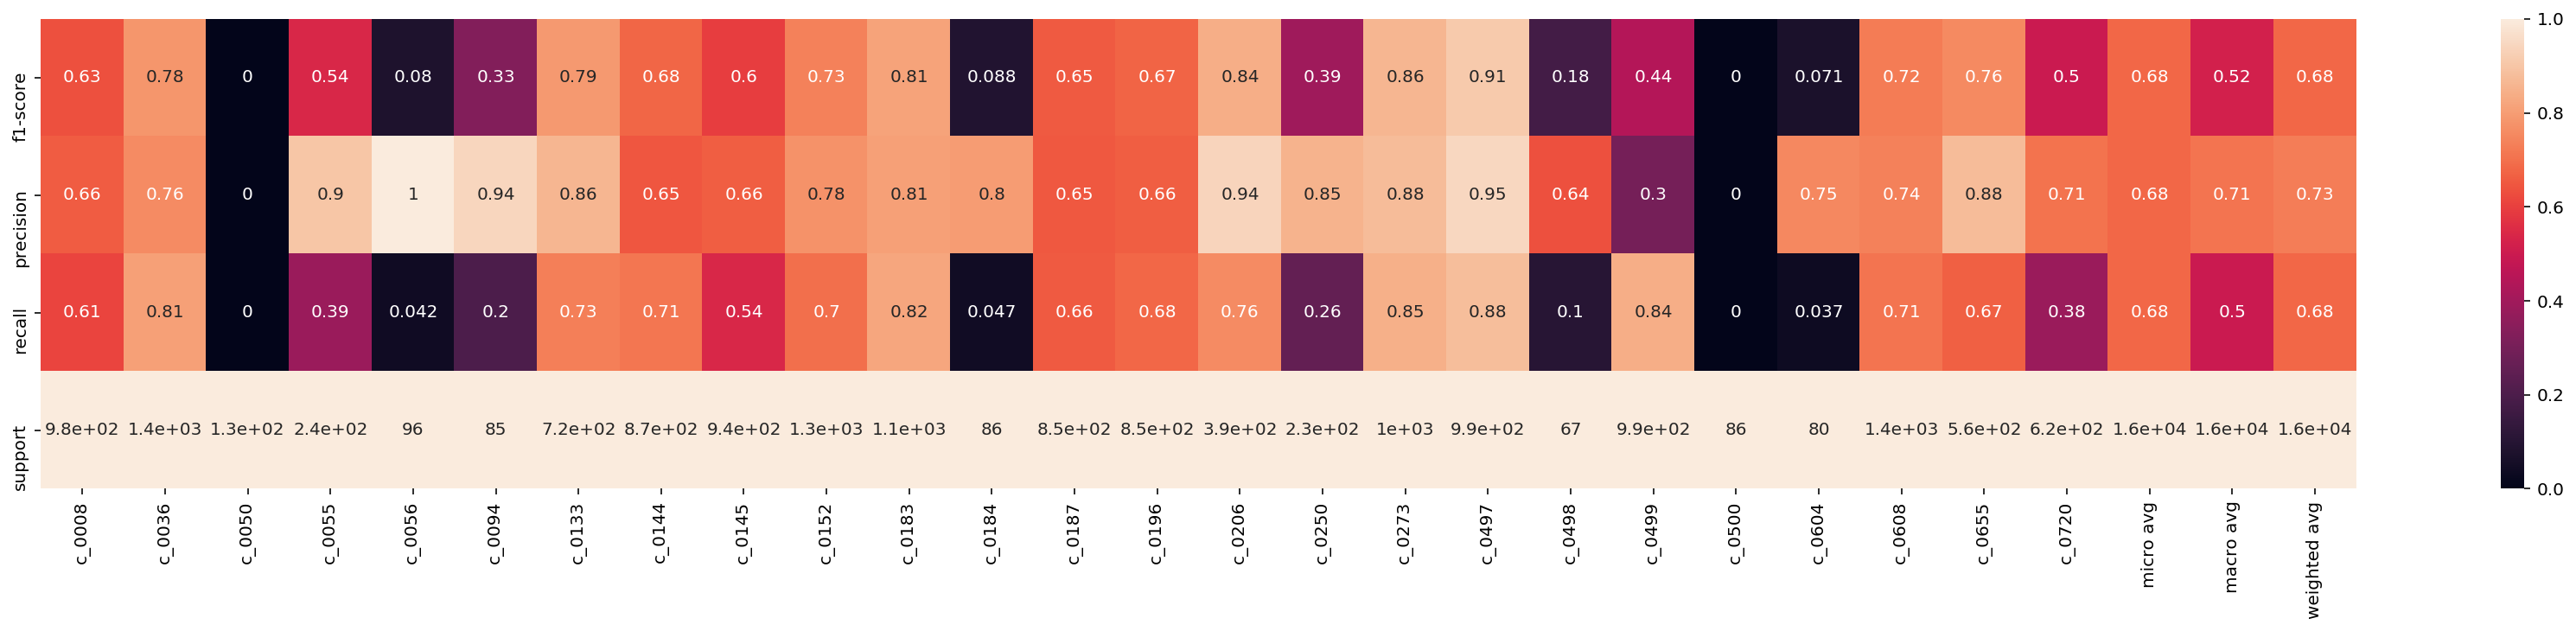

In [106]:
plt.figure(figsize=(30,5))
class_rep = pd.DataFrame(sklearn.metrics.classification_report(y_true=y_true_lbl, y_pred=y_pred_lbl, output_dict=True))
sns.heatmap( class_rep, annot=True, vmax=1)

Poor performance on `c_0500` and `c_0500`, probably because there are very few instances of the above in training. Let's correlate this.

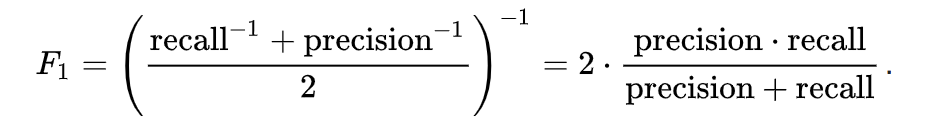

/Users/ijoseph/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


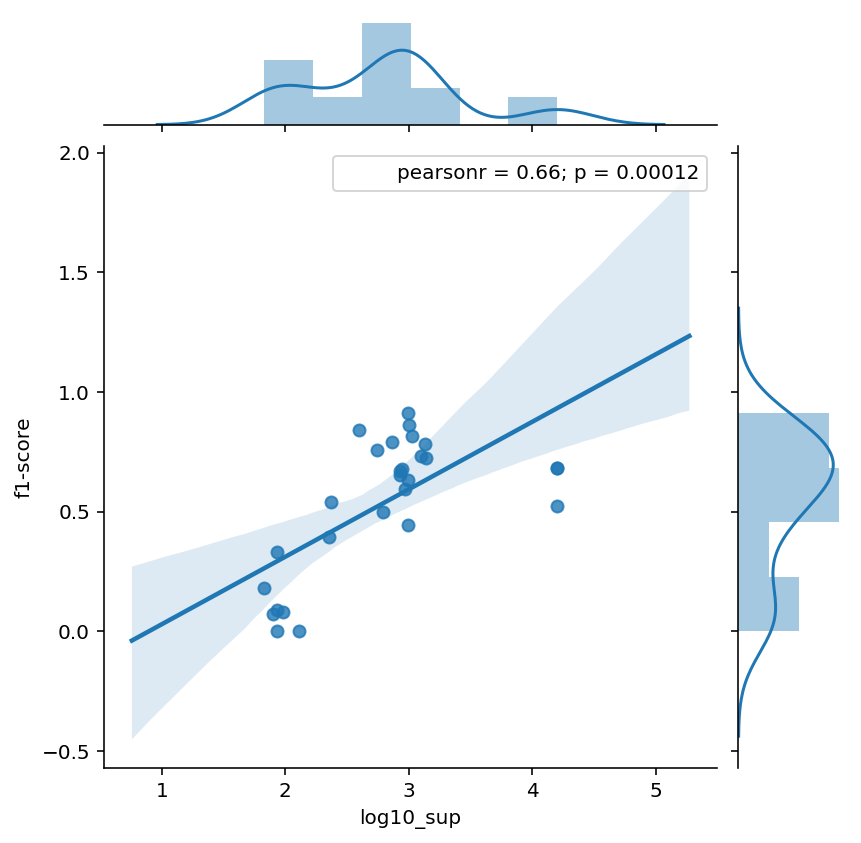

In [125]:
j = sns.jointplot(data=class_rep.T.assign(log10_sup= lambda row: np.log10(row.support)), x='log10_sup', y='f1-score', kind='reg')
j.annotate(scipy.stats.pearsonr)

⇒ yes. Smaller (less support) means worse performance.

## Confusion Matrix

Text(159.0, 0.5, 'True label')

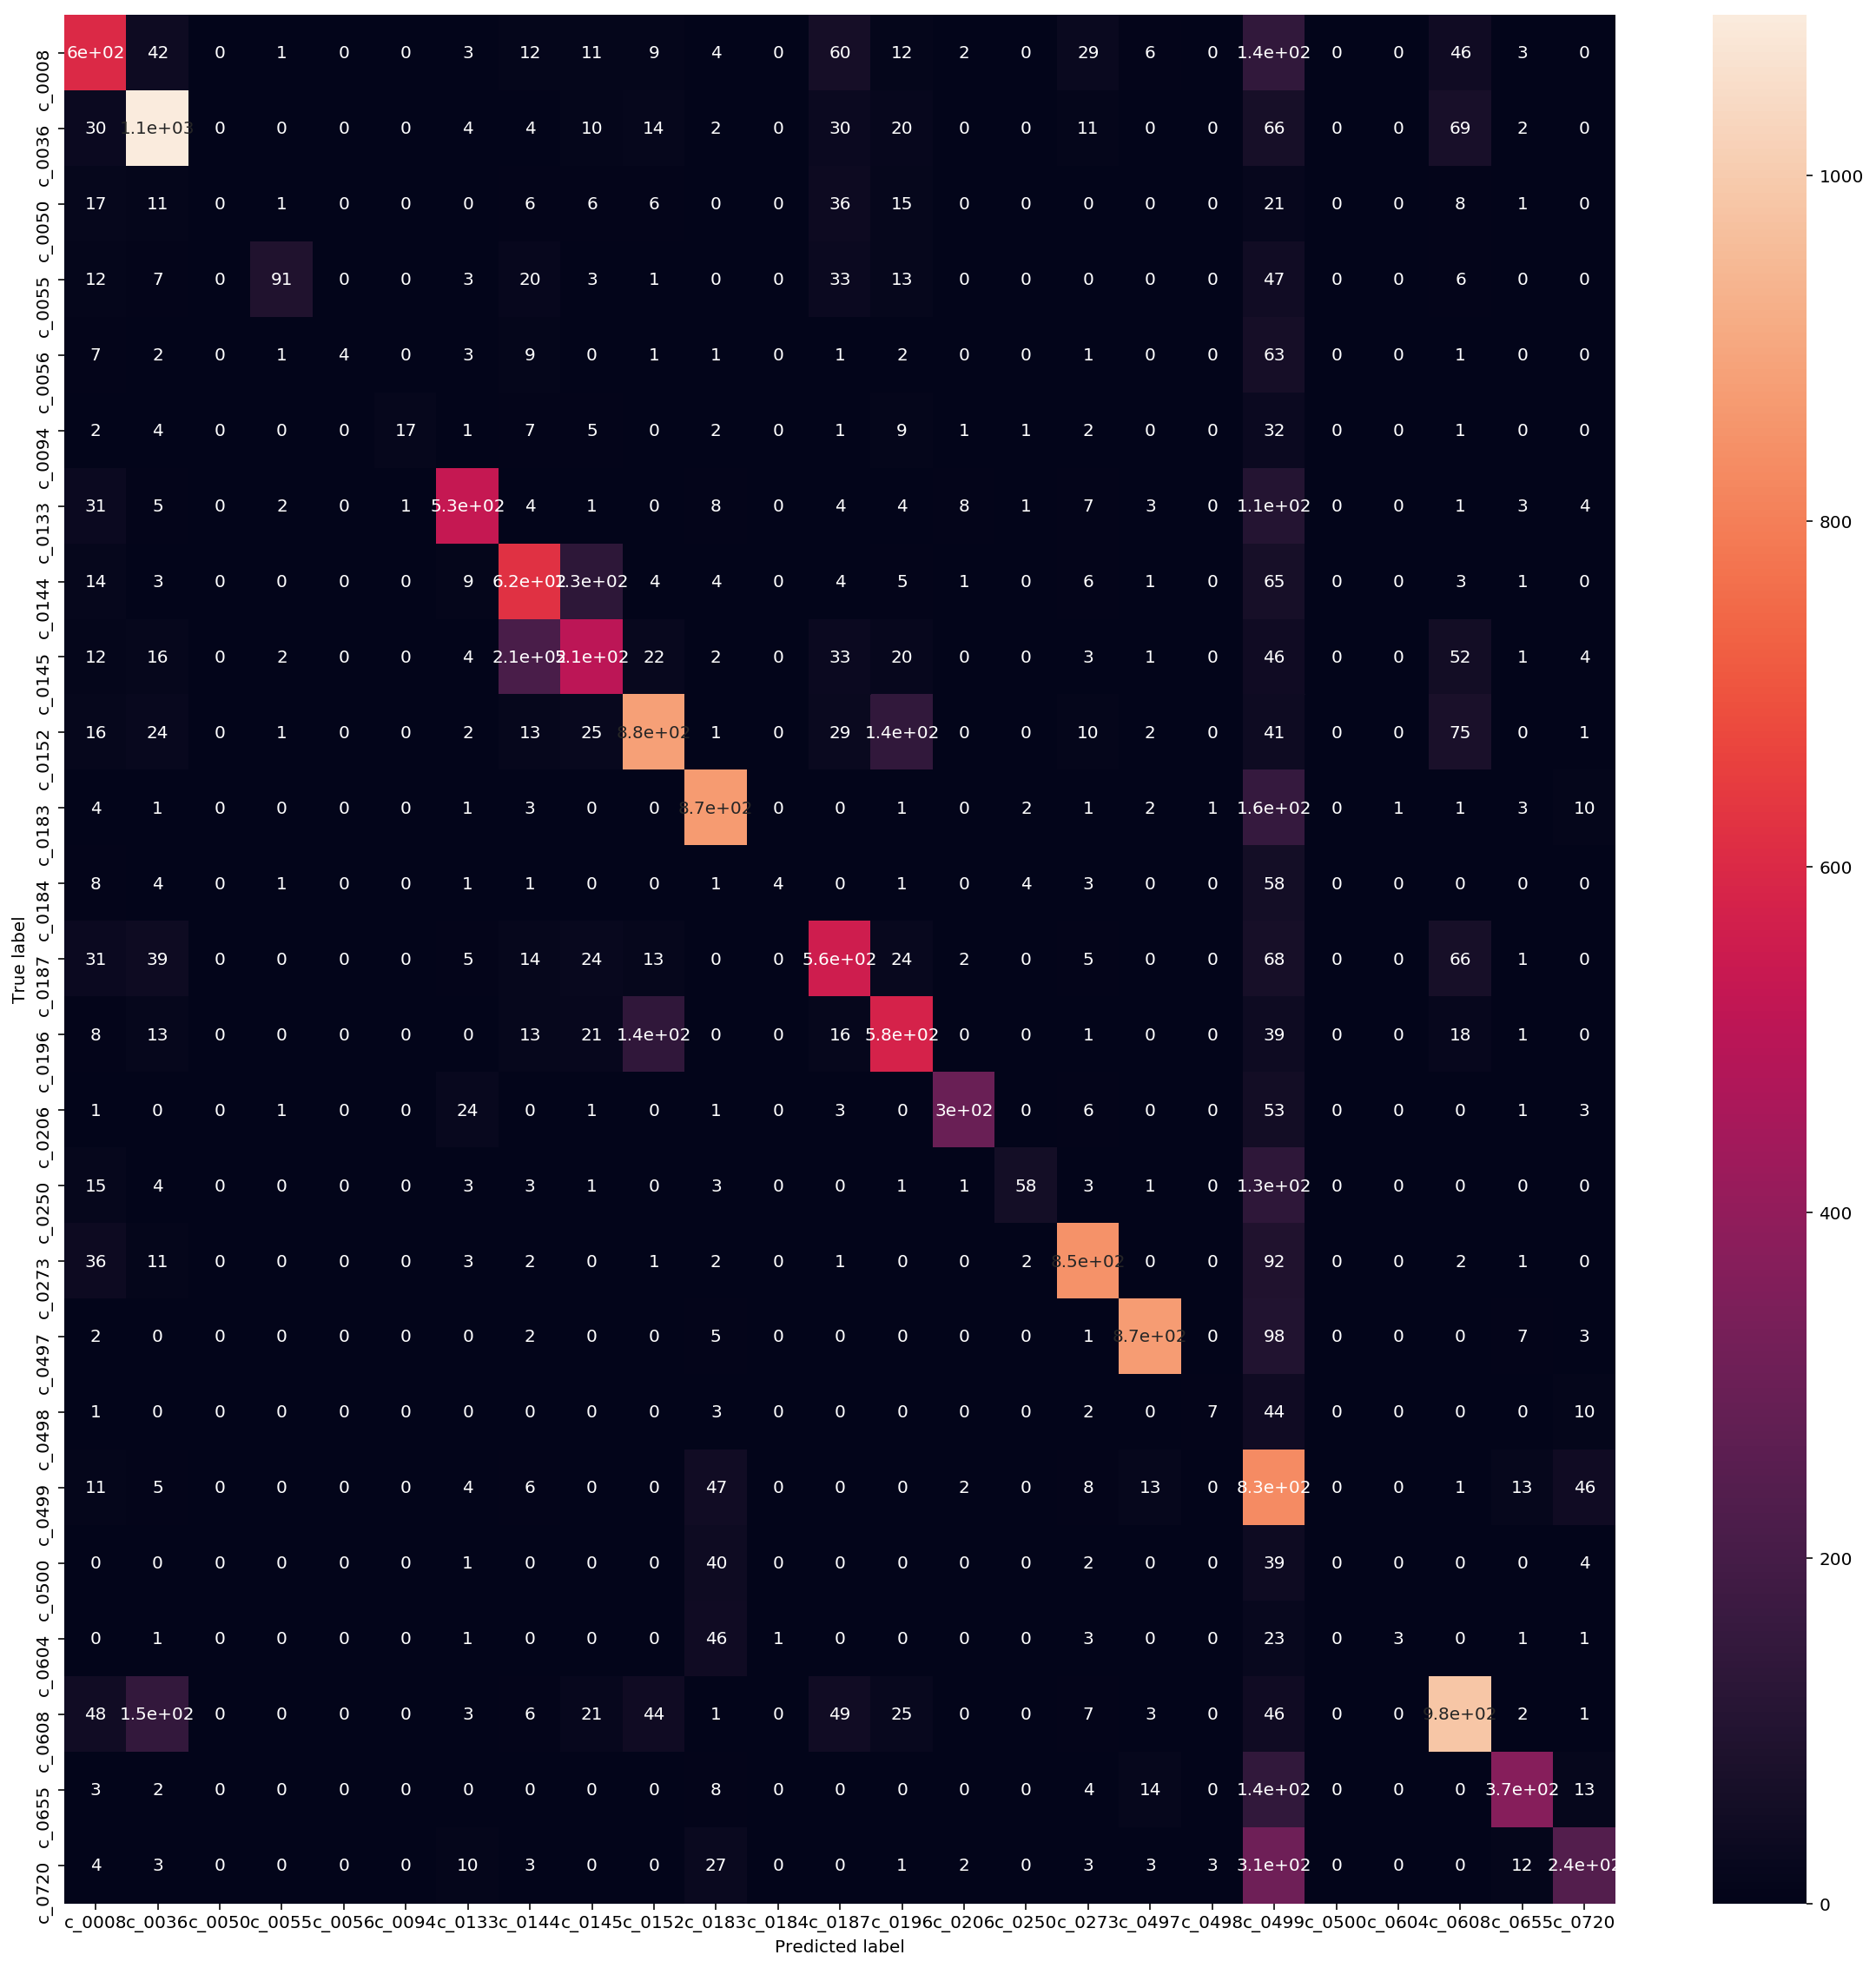

In [97]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(sklearn.metrics.confusion_matrix(y_true=train.DX_enc, y_pred=y_pred), annot=True)
ax.set_xticklabels(le_encoder.classes_)
ax.set_yticklabels(le_encoder.classes_)

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

Looks overall reasonable.